# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [347]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('/Users/hatimhussaini/Downloads/Github Repository/portfolio-part-3-hatimhussaini/loan_approval.csv')
data.head()

ApplicationDate   Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01  45.0         39948          617         Employed   
1      2018-01-02  38.0         39709          628         Employed   
2      2018-01-03  47.0         40724          570         Employed   
3      2018-01-04  58.0         69084          545         Employed   
4      2018-01-05  37.0        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972         11    126928   
1    3309.083333                   0.935132          3     43609   
2    3393.666667                   0.872241          6      5205   
3    5757.000000                   0.896155          5     99452   
4    8605.333333                   0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0        NaN  
1            0       52.0  
2            0        NaN  
3            0        NaN  
4            1        NaN  

[5 rows x 36 columns]

In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [351]:
data.describe(include="all")

ApplicationDate           Age   AnnualIncome   CreditScore  \
count            20000  19900.000000   20000.000000  20000.000000   
unique           20000           NaN            NaN           NaN   
top         2018-01-01           NaN            NaN           NaN   
freq                 1           NaN            NaN           NaN   
mean               NaN     39.751759   59161.473550    571.612400   
std                NaN     11.630809   40350.845168     50.997358   
min                NaN     18.000000   15000.000000    343.000000   
25%                NaN     31.750000   31679.000000    540.000000   
50%                NaN     40.000000   48566.000000    578.000000   
75%                NaN     48.000000   74391.000000    609.000000   
max                NaN     80.000000  485341.000000    712.000000   

       EmploymentStatus EducationLevel    Experience     LoanAmount  \
count             20000          20000  20000.000000   20000.000000   
unique                3              5           NaN            NaN   
top            Employed       Bachelor           NaN            NaN   
freq              17036           6054           NaN            NaN   
mean                NaN            NaN     17.522750   24882.867800   
std                 NaN            NaN     11.316836   13427.421217   
min                 NaN            NaN      0.000000    3674.000000   
25%                 NaN            NaN      9.000000   15575.000000   
50%                 NaN            NaN     17.000000   21914.500000   
75%                 NaN            NaN     25.000000   30835.000000   
max                 NaN            NaN     61.000000  184732.000000   

        LoanDuration MaritalStatus  ...  MonthlyIncome  \
count   20000.000000         19900  ...   20000.000000   
unique           NaN             4  ...            NaN   
top              NaN       Married  ...            NaN   
freq             NaN          9999  ...            NaN   
mean       54.057000           NaN  ...    4891.715521   
std        24.664857           NaN  ...    3296.771598   
min        12.000000           NaN  ...    1250.000000   
25%        36.000000           NaN  ...    2629.583333   
50%        48.000000           NaN  ...    4034.750000   
75%        72.000000           NaN  ...    6163.000000   
max       120.000000           NaN  ...   25000.000000   

       UtilityBillsPaymentHistory     JobTenure      NetWorth  \
count                20000.000000  20000.000000  2.000000e+04   
unique                        NaN           NaN           NaN   
top                           NaN           NaN           NaN   
freq                          NaN           NaN           NaN   
mean                     0.799918      5.002650  7.229432e+04   
std                      0.120665      2.236804  1.179200e+05   
min                      0.259203      0.000000  1.000000e+03   
25%                      0.727379      3.000000  8.734750e+03   
50%                      0.820962      5.000000  3.285550e+04   
75%                      0.892333      6.000000  8.882550e+04   
max                      0.999433     16.000000  2.603208e+06   

        BaseInterestRate  InterestRate  MonthlyLoanPayment  \
count       20000.000000  20000.000000        20000.000000   
unique               NaN           NaN                 NaN   
top                  NaN           NaN                 NaN   
freq                 NaN           NaN                 NaN   
mean            0.239124      0.239110          911.607052   
std             0.035509      0.042205          674.583473   
min             0.130101      0.113310           97.030193   
25%             0.213889      0.209142          493.763700   
50%             0.236157      0.235390          728.511452   
75%             0.261533      0.265532         1112.770759   
max             0.405029      0.446787        10892.629520   

        TotalDebtToIncomeRatio  LoanApproved    RiskScore  
count             20000.000000  20000.0000

## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [355]:
# step 1.1.1: dropping columns with more than 50% null values.
missing_percentage = data.isnull().mean() * 100
print(missing_percentage[missing_percentage>50])# check which columns have a more than 50% null value ratio
data1 = data.drop(missing_percentage[missing_percentage>50].index, axis = 1)# drop those column/s (RiskScore in this case)
print(data1.shape)# double check the dataframe. 

RiskScore    95.0
dtype: float64
(20000, 35)


In [357]:
# Step 1.1.2: dropping null catagorical variables
object_columns = data1.select_dtypes(include = 'object') # finding out the categorical columns
object_columns.columns
clean_data = data1.dropna(subset = object_columns.columns) # drop whole row if null value in these columns
print(clean_data.shape) # double check data (100 rows dropped)

(19900, 35)


In [359]:
# Step 1.1.3: missing value imputation for null numerical columns
 # select all numerical columns:
numerical_columns = clean_data.select_dtypes(include = 'number')

 #fill all null cells with the mean of the respective column:
clean_data[numerical_columns.columns] = numerical_columns.fillna(numerical_columns.mean()) 

 #Double check if there are any null values in the dataframe:
print(clean_data.isnull().sum())

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

/var/folders/lw/zb_b4kcs54lcy4zn4llwx5m40000gn/T/ipykernel_3538/2778421290.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[numerical_columns.columns] = numerical_columns.fillna(numerical_columns.mean())


### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [362]:
# Step 1.2.1: dropping categorical columns with unique values:
clean_object_columns = clean_data.select_dtypes(include=['object'])

#drop columns where all values are unique
unique_values = clean_object_columns.columns[clean_object_columns.nunique() == len(clean_data)]
cleaner_data = clean_data.drop(unique_values, axis=1)

#display the updated dataset (ApplicationDate dropped)
print(cleaner_data.shape)

(19900, 34)


In [364]:
# Step 1.2.2: One Hot Encoding
 #use the latest categorical columns from cleaned data:
cleanest_object_columns = cleaner_data.select_dtypes(include=['object'])
 # encode using pd.get_dummies()
encoded_data = pd.get_dummies(cleaner_data, columns = cleanest_object_columns.columns)
 # double check the columns (there are now columns for each type of ubnique values in categorical columns)
print(encoded_data.shape)

(19900, 50)


## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [368]:
# Step 2.1: buliding a logistic regrssion model:

# Splitting the data into training(80%) and testing data (20%) with random_state=47807040
train, test = train_test_split(encoded_data, test_size=0.2, random_state=47807040)
print(train.shape)
print(test.shape)

(15920, 50)
(3980, 50)


### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [371]:
# Building the Logistic Regression model
reg = LogisticRegression()

x_train = train.drop('LoanApproved', axis=1) 
x_test = test.drop('LoanApproved', axis=1)   

y_train = train['LoanApproved'] 
y_test = test['LoanApproved']    

reg.fit(x_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_) 

# predict the train & test set
y_test_pred = reg.predict(x_test)
y_train_pred = reg.predict(x_train)

y = x * [[-1.24376468e-04 -3.00695086e-05 -2.20381828e-03 -2.72674523e-05
  -1.81597954e-04 -4.18799735e-04 -6.75540102e-06 -2.92310478e-03
  -1.28927419e-06 -1.33334301e-05 -4.85664176e-06 -1.29752758e-06
  -1.47716044e-06 -1.96177097e-06 -9.63739785e-05  2.60765428e-07
  -1.92794206e-05 -7.85326308e-05  1.96358160e-06 -3.81036545e-06
   1.24384944e-03 -3.54723282e-06 -2.24081284e-05  5.31064401e-06
  -1.25426182e-06 -1.54758132e-06  2.18394033e-04 -2.11638814e-06
  -3.38250551e-06 -8.36088903e-08 -9.44851712e-07 -1.88758259e-06
  -4.44678596e-07  9.54226044e-07 -4.20916916e-06  1.17623818e-06
  -3.92881407e-07 -2.42314355e-06 -1.15091263e-06 -4.44028534e-07
  -7.82301901e-07 -9.70697372e-07 -5.11225074e-07 -2.14674177e-06
  -8.50812845e-07 -1.34723759e-06 -2.88884531e-07 -1.29964857e-06
  -6.24382582e-07]] + [-4.41096612e-06]


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [373]:
# Print the accuracy and F1-score for both training and testing data
print(f"Training Data Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Training Data F1 Score: {f1_score(y_train, y_train_pred)}")

print(f"Testing Data Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Testing Data F1 Score: {f1_score(y_test, y_test_pred)}")

Training Data Accuracy: 0.8896984924623116
Training Data F1 Score: 0.7573915446255872
Testing Data Accuracy: 0.8909547738693467
Testing Data F1 Score: 0.7494226327944573


#### Is the Logistic Regression Model overfitting? A justification:  
Overfitting occurs when they testing data performs much worse than the training data which may suggest that the model does not generalise well.  

 When comparing the Accuracy variable of training data (0.892) and testing data (0.883), we see that the accuracy for training data is higher than that of testing data but the differences minimal. This suggests that the model is not significantly overfitting and performs well on unseen data.  

 The F1 score of the training data (0.758) and the testing data (0.742) also show minimal differences between the two set of variables and test again suggest that the model is not overfitting.  

 In this loan approval dataframe, they model is not overfitting much.

### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

In [377]:
#the model has difficulty trying to predict the loanApproved column with different types of variables,
#all with different ranges and meaning for example where 1 (e.g number of dependants) would be a good score for omne type of column,
#it would be really bad in another type of column (e.g income)
# we scale it to make all values comparable and predictable.

# Scale the data with a mean of 0 and a stdev of 1
scaler = StandardScaler()
x_train_scalar = scaler.fit_transform(x_train)
x_test_scalar = scaler.transform(x_test)

# Make arrays to track feature count, accuracy, and f1 score
feature_tracker = []
accuracy_tracker = []
f1_score_tracker = []

# perform RFE with varying numbers of features
for selected_feature in range(1, len(encoded_data.columns) + 1): #start from the 1st column and go uptil the 
    #50th one (the last number is exclusive of the range above)
    rfe = RFE(estimator=reg, n_features_to_select=selected_feature)
    rfe.fit(x_train_scalar, y_train)
    
    # predict on the test set
    y_test_pred_scalar = rfe.predict(x_test_scalar)
    
    # store the number of features and performance metrics
    feature_tracker.append(selected_feature)
    accuracy_tracker.append(accuracy_score(y_test, y_test_pred_scalar))
    f1_score_tracker.append(f1_score(y_test, y_test_pred_scalar))


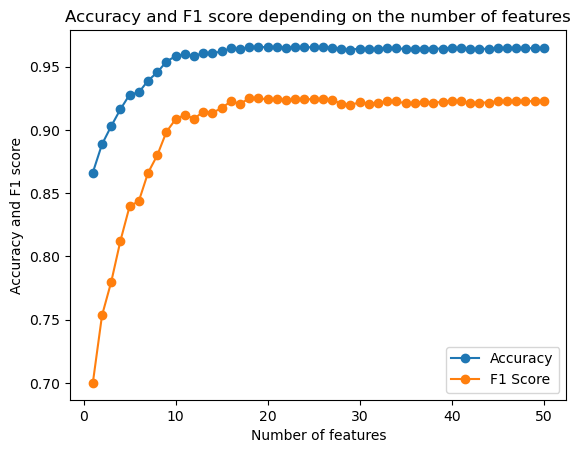

In [379]:
# Plot the lineplot for arrays of accuracy and F1 score
plt.plot(feature_tracker, accuracy_tracker, label='Accuracy', marker='o')
plt.plot(feature_tracker, f1_score_tracker, label='F1 Score', marker='o')
plt.title('Accuracy and F1 score depending on the number of features')
plt.xlabel('Number of features')
plt.ylabel('Accuracy and F1 score')
plt.legend()

In [381]:
# Step 2.3.2: Performance maximaisation and Feature minimaisation
# find out maximum accuracy
max_accuracy = max(accuracy_tracker)
print(f" Max accuracy feature index: {accuracy_tracker.index(max_accuracy)}") 

# if we find an accuracy value even 98% of the max value occuring in lesser features eliminated, 
#we can use it for feature minimisation
accuracy_threshold = 0.98 * max_accuracy

#looping through the index to find a value near max in the least amount of features. if there is none 
#before, the max feature will be selected.
for i, accuracy in enumerate(accuracy_tracker):
    if accuracy >= accuracy_threshold:
        feature_index = feature_tracker[i] # the first value which is 98% or above of the max is chosen for 
        #feature minimisation purposes
        break
        
print(f" optimal number of features: {feature_index}")


 Max accuracy feature index: 17
 optimal number of features: 9


In [383]:
# redo the RFE with optimal number of features

rfe_optimal = RFE(estimator=reg, n_features_to_select=feature_index)
rfe_optimal.fit(x_train_scalar, y_train)

retained_features = x_train.columns[rfe_optimal.support_]
print(retained_features)

Index(['CreditScore', 'LoanAmount', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory', 'MonthlyIncome',
       'NetWorth', 'InterestRate', 'TotalDebtToIncomeRatio'],
      dtype='object')


## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Select the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [386]:
# Step 3.1.2
#make 2 new dataframes for the scalar train and test data with their proper column names.
scaled_train_data = pd.DataFrame(x_train_scalar, columns=x_train.columns)
scaled_test_data = pd.DataFrame(x_test_scalar, columns = x_test.columns)

# filter out the columns we need from dataframe made above
x_train_retained = scaled_train_data[retained_features]
x_test_retained = scaled_test_data[retained_features]

# apply the knn classifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train_retained, y_train)

y_test_pred_retained = knn.predict(x_test_retained)

# print accuracy and f1 for testing data.
test_accuracy = accuracy_score(y_test, y_test_pred_retained)
test_f1 = f1_score(y_test, y_test_pred_retained)

print(f"Testing Accuracy: {test_accuracy}")
print(f"Testing F1 Score: {test_f1}")

Testing Accuracy: 0.9072864321608041
Testing F1 Score: 0.7989100817438692


In [387]:
#step 3.1.3:
y_train_pred_retained = knn.predict(x_train_retained)

train_accuracy = accuracy_score(y_train, y_train_pred_retained)
train_f1 = f1_score(y_train, y_train_pred_retained)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training F1 Score: {train_f1}")

Training Accuracy: 1.0
Training F1 Score: 1.0


#### Analysis on the results of Knn Classifier Model  
The model shows perfect training accuracy and F1 score of 1.0, indicating that it has likely memorized the training data. Despite this, the test performance remains strong with accuracy of 0.90 and F1 score of 0.80, showing that the model still generalizes somewhat well to unseen data.

### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

In [393]:
#Step 3.2.1
parameter = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(estimator=knn, param_grid= parameter, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(x_train_retained, y_train)

#Get the best k valeu
best_k = grid_search.best_params_
print(f"Best K: {best_k}")

#Train the knn classifier with the 15
best_knn = KNeighborsClassifier(n_neighbors=15)
best_knn.fit(x_train_retained, y_train)

# Predict test data using the best Knn 
best_y_test_pred = best_knn.predict(x_test_retained)
best_test_accuracy = accuracy_score(y_test, best_y_test_pred)

print(f"Test Accuracy with Best K: {best_test_accuracy}" )

Best K: {'n_neighbors': 15}
Test Accuracy with Best K: 0.935427135678392


In [394]:
#make a new dataframe from the results of the grid search to see all the different scores for all 30 'k' values
grid = pd.DataFrame(grid_search.cv_results_)
print(grid.shape)
print(grid.head())

(30, 14)
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.007805      0.002193         0.137978        0.012485   
1       0.005819      0.000269         0.145851        0.006265   
2       0.005672      0.000077         0.152189        0.002357   
3       0.005616      0.000063         0.163326        0.005075   
4       0.005550      0.000050         0.168956        0.005908   

  param_n_neighbors              params  split0_test_score  split1_test_score  \
0                 1  {'n_neighbors': 1}           0.909234           0.911118   
1                 2  {'n_neighbors': 2}           0.902638           0.912688   
2                 3  {'n_neighbors': 3}           0.918970           0.926193   
3                 4  {'n_neighbors': 4}           0.915515           0.923681   
4                 5  {'n_neighbors': 5}           0.925565           0.929334   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.905779  

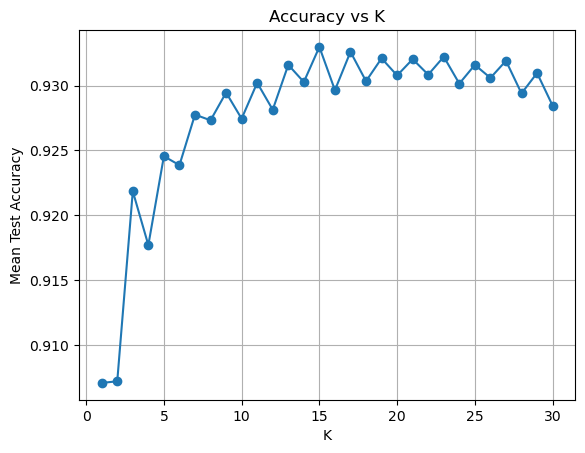

In [395]:
# Step 3.2.2:
# Get the mean test accuracy for each K
mean_test_accuracy = grid['mean_test_score']

# Plot the accuracy vs. K
plt.plot(range(1, 31), mean_test_accuracy, marker='o')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Mean Test Accuracy')
plt.grid(True)

In [399]:
best_f1_score = f1_score(y_test, best_y_test_pred)

print(f"Test Accuracy with Best K: {best_test_accuracy}" )
print(f"Test F1 Score with Best K: {best_f1_score}")

Test Accuracy with Best K: 0.935427135678392
Test F1 Score with Best K: 0.8523836875358989


### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

 Euclidian Accuracy: 0.935427135678392
 L1 Accuracy: 0.9384422110552764
 cosine Accuracy: 0.9316582914572864
 Euclidian F1 score: 0.8523836875358989
 L1 F1 score: 0.8595988538681948
 cosine F1 score: 0.851528384279476


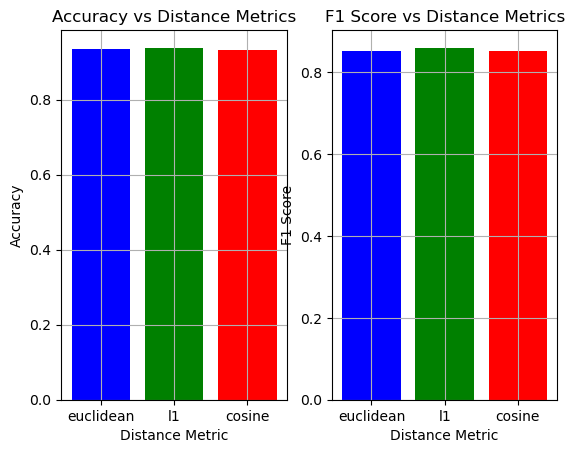

In [402]:
# Step 3.3.1:
#arrays to store the results for accuracy and F1 scores
distance_metrics = ['euclidean', 'l1', 'cosine']
accuracy_results = []
f1_results = []

#for Loop over each metric and fo the whole Knn classifier model for each metric
for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=15, metric=metric)
    knn.fit(x_train_retained, y_train)
    y_test_pred = knn.predict(x_test_retained)
    
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    accuracy_results.append(accuracy)
    f1_results.append(f1)

#bar charts
# Accuracy
plt.subplot(1, 2, 1) 
plt.bar(distance_metrics, accuracy_results,color=['blue', 'green', 'red'])
plt.title('Accuracy vs Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.grid(True)
# F1 Score
plt.subplot(1, 2, 2) 
plt.bar(distance_metrics, f1_results, color=['blue', 'green', 'red'])
plt.title('F1 Score vs Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('F1 Score')
plt.grid(True)

print(f" Euclidian Accuracy: {accuracy_results[0]}")
print(f" L1 Accuracy: {accuracy_results[1]}")
print(f" cosine Accuracy: {accuracy_results[2]}")
print(f" Euclidian F1 score: {f1_results[0]}")
print(f" L1 F1 score: {f1_results[1]}")
print(f" cosine F1 score: {f1_results[2]}")

#### Analysis on Different types of Distance Metrics used in KNN Classifier where k = 15:  
All the Distance metrics gave out similiar scores in accuracy and F1 scores but if we were to choose the best metric out of Euclidian, L1 (Manhattan) or Cosine, L1 (93.8%) would be the choice to go with as it has slightly higher Accuracy than the Euclidean (93.5%) and Cosine (93.2%) metrics. The L1 (0.86) F1 score is also marginally higher with Euclidean (0.852) a close second and Cosine (0.851) coming in at last